In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import sklearn
import warnings
import plotly.plotly as py
import plotly.graph_objs as go
warnings.filterwarnings("ignore", category=FutureWarning)
# Machine Learning Packages
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

# Print out a quick overview of the data
dataset=pd.read_csv("dataset.csv")
dataset.head()
dataset.describe(include='all') # Quick statistical summary of data
dataset.drop('URL', axis=1, inplace=True) # Drop the URL column since that is a unique column for training

# Take a look at any null values to clean up data, Likely need to do something with these empty datasets
print(dataset.isnull().sum())
dataset[pd.isnull(dataset).any(axis=1)]
dataset = dataset.interpolate() # Interpolate our data to get rid of null values
print(dataset.isnull().sum())
dataset['SERVER'].fillna('RARE_VALUE', inplace=True)  # For some reason there's still a isnull in the SERVER column
dataset_numerical = pd.get_dummies(dataset,prefix_sep='--') # Convert categorical columns to numbered categorical columns

# Separate predictors and response
X = dataset_numerical.drop('Type',axis=1) #Predictors
y = dataset_numerical['Type']

# Our split will be a 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # Get a training and test dataset

#Model Building, using logistic regression
logit = LogisticRegression()
logit.fit(X_train, y_train)

# Accuracy of Our Model
print("Accuracy ",logit.score(X_test, y_test))
New_predict = logit.predict(X_test)
print('Misclassified samples: %d' % (y_test != New_predict).sum())
print(New_predict)
#print(y_test)

URL_LENGTH                     0
NUMBER_SPECIAL_CHARACTERS      0
CHARSET                        0
SERVER                         1
CONTENT_LENGTH               812
WHOIS_COUNTRY                  0
WHOIS_STATEPRO                 0
WHOIS_REGDATE                  0
WHOIS_UPDATED_DATE             0
TCP_CONVERSATION_EXCHANGE      0
DIST_REMOTE_TCP_PORT           0
REMOTE_IPS                     0
APP_BYTES                      0
SOURCE_APP_PACKETS             0
REMOTE_APP_PACKETS             0
SOURCE_APP_BYTES               0
REMOTE_APP_BYTES               0
APP_PACKETS                    0
DNS_QUERY_TIMES                1
Type                           0
dtype: int64
URL_LENGTH                   0
NUMBER_SPECIAL_CHARACTERS    0
CHARSET                      0
SERVER                       1
CONTENT_LENGTH               0
WHOIS_COUNTRY                0
WHOIS_STATEPRO               0
WHOIS_REGDATE                0
WHOIS_UPDATED_DATE           0
TCP_CONVERSATION_EXCHANGE    0
DIST_REMOTE_TCP_P

In [2]:
# Visualize our results
def print_score(classifier,X_train,y_train,X_test,y_test,train=True):
    if train == True:
        print("Training results:\n")
        print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_train,classifier.predict(X_train))))
        print('Classification Report:\n{}\n'.format(classification_report(y_train,classifier.predict(X_train))))
        print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_train,classifier.predict(X_train))))
        res = cross_val_score(classifier, X_train, y_train, cv=10, n_jobs=-1, scoring='accuracy')
        print('Average Accuracy:\t{0:.4f}\n'.format(res.mean()))
        print('Standard Deviation:\t{0:.4f}'.format(res.std()))
    elif train == False:
        print("Test results:\n")
        print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_test,classifier.predict(X_test))))
        print('Classification Report:\n{}\n'.format(classification_report(y_test,classifier.predict(X_test))))
        print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_test,classifier.predict(X_test))))

print_score(logit,X_train,y_train,X_test,y_test,train=False)

Test results:

Accuracy Score: 0.9132

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95       310
           1       0.83      0.43      0.56        47

   micro avg       0.91      0.91      0.91       357
   macro avg       0.88      0.71      0.76       357
weighted avg       0.91      0.91      0.90       357


Confusion Matrix:
[[306   4]
 [ 27  20]]



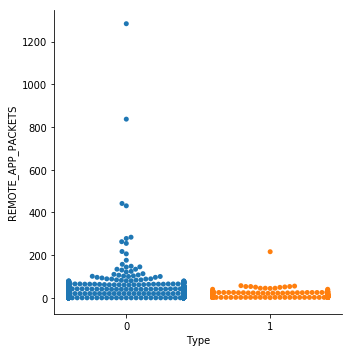

In [3]:
import seaborn as sns
sns.catplot(x='Type',y='REMOTE_APP_PACKETS', kind='swarm',hue='Type', data=dataset_numerical);
# fig = plt.gcf()
# fig.set_size_inches(10, 5)
plt.show()

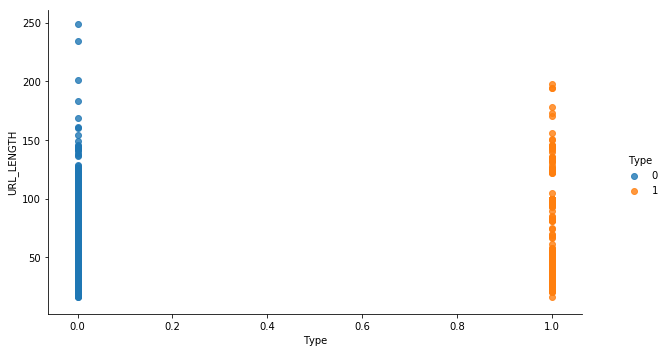

In [4]:
import seaborn as sns
sns.lmplot( 'Type','URL_LENGTH',dataset_numerical, hue='Type', fit_reg=False)
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.show()

In [5]:
dataset_numerical['Type'].value_counts()

0    1565
1     216
Name: Type, dtype: int64

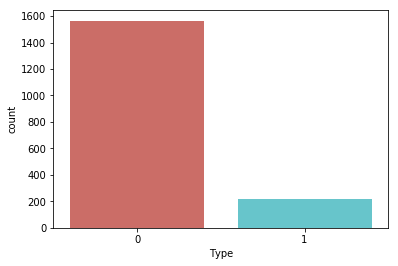

In [6]:
# 0 Benign 1 Malacious
sns.countplot(x='Type',data=dataset_numerical,palette='hls')
plt.show()

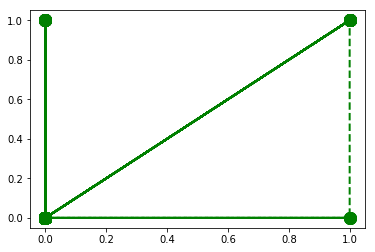

In [7]:
plt.plot(New_predict, y_test, color='green', marker='o', linestyle='dashed',linewidth=2, markersize=12)